# Performing regression with SciPy

This notebook will demonstrate how to use the SciPy library to perform linear regression on a dataset. I will perform linear regression on randomly generated data and on the wine quality dataset.

First I will import the packages that will be needed to perofrm the regression. **Numpy** is used for performing mathematical operations and generating arrays of datasets. **Pandas** is used for working with datasets as dataframes. The **stats** module of the **SciPy** library contains functions for performing statistical operations. **Matplotlib** and **Seaborn** are used for data visulaisation.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

### Performing linear regression on randomly generated data using SciPy.Sats

I will first demonstrate Scipy.stats' regression tools using randomly generated data, following the example outlined in [this article](https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b).

In [2]:
# demonstration on randomly generated data
# https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b

#generating the data points
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

# adding random noise
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

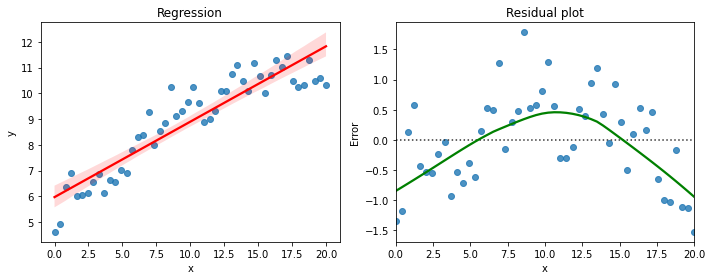

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.regplot(x=x,y=y,line_kws={'color':'red'})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')
plt.subplot(1,2,2)
sns.residplot(x=x,y=y,lowess=True,line_kws={'color':'green'})
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Residual plot')
plt.tight_layout()

With the data generated and visualised, the regression can be performed simply by using Scipy.stats' *linregress* function and inputting the *x* amd *y* value arrays.

The slope, intercept, r-value, p-value, and standard error values can then be called as attributes from the resulting *LinregressResult* object.

In [8]:
# using scipy.stats to find the parameters
result = ss.linregress(x,y)

result.slope

0.29289690481562325

In [9]:
result.intercept

5.968228006496777

In [10]:
result.rvalue

0.9184408354646605

In [11]:
result.pvalue

5.7612621144065296e-21

In [12]:
result.stderr

0.018207636224184774

***

### Performing linear regression on a dataset using SciPy.Sats

I will be using the red wine quality dataset for this regression, following the example outlined in [this analysis](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46).

I begin by importing the dataset as a CSV object using **Pandas**, passing the semicolon as a separator value to divide the CSV values into the appropriate columns. I have also manually replaced spaces in the column headings with underscores to more easily use the headings as function parameters.

In [14]:
wine_data = pd.read_csv('winequality-red.csv',sep=';')

In [73]:
wine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [74]:
wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


I then create three new subsets of the data, which I will compare against each other with the regression results to determine which of three wine attributes -- alcohol content, pH value, and residual sugar -- has the greatest bearing on the dependent variable, overall wine quality.

In [16]:
x_wine = wine_data.quality
y_wine = wine_data.fixed_acidity

In [17]:
wine_result1 = ss.linregress(x_wine, y_wine)
wine_result1.slope

0.2674517619186496

In [18]:
wine_result1.intercept

6.812273121694265

In [19]:
wine_result1.rvalue

0.12405164911322428

In [20]:
wine_result1.pvalue

6.495635009279552e-07

In [21]:
wine_result1.stderr

0.05353315585201006

***

In [22]:
x_wine = wine_data.quality
y_wine = wine_data.pH

In [23]:
wine_result2 = ss.linregress(x_wine, y_wine)
wine_result2.slope

-0.0110367541955159

In [24]:
wine_result2.intercept

3.37331659087554

In [25]:
wine_result2.rvalue

-0.05773139120538216

In [32]:
wine_result2.pvalue

0.02096277865147354

In [33]:
wine_result2.stderr

0.004775863957969815

***

In [57]:
x_wine = wine_data.quality
y_wine = wine_data.residual_sugar

In [58]:
wine_result3 = ss.linregress(x_wine, y_wine)
wine_result3.slope

0.023973939374300205

In [59]:
wine_result3.intercept

2.4036878413751137

In [60]:
wine_result3.rvalue

0.013731637340066308

In [61]:
wine_result3.pvalue

0.5832180131580473

In [62]:
wine_result3.stderr

0.043684128006666795

With the three regressions performed using SciPy's tools, I now visualise each of the three variable pairs to show how each of the three independent variables relate to wine quality.

#### Alcohol content vs. quality

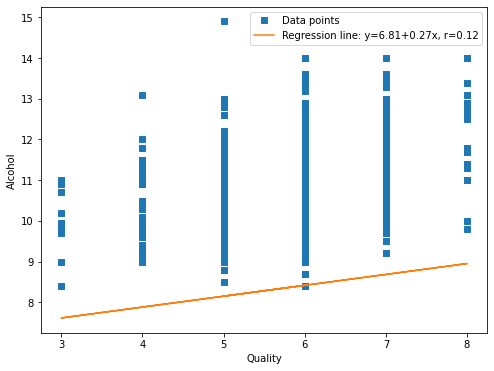

In [63]:


line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result1.slope:.2f}x, r={wine_result1.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.alcohol)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result1.intercept + wine_result1.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('Alcohol')
ax.legend(facecolor='white')
plt.show()

#### pH values vs. quality

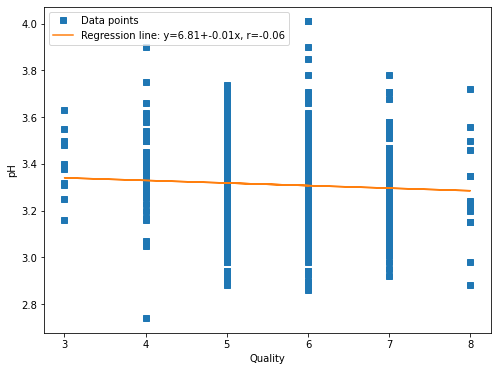

In [66]:
line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result2.slope:.2f}x, r={wine_result2.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.pH)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result2.intercept + wine_result2.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('pH')
ax.legend(facecolor='white')
plt.show()

#### Residual sugar vs. quality

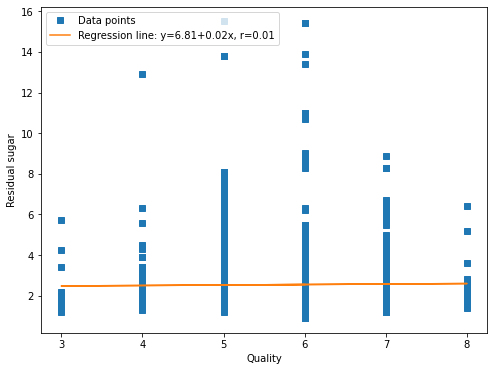

In [69]:
line = f'Regression line: y={wine_result1.intercept:.2f}+{wine_result3.slope:.2f}x, r={wine_result3.rvalue:.2f}'

x = np.array(wine_data.quality)
y = np.array(wine_data.residual_sugar)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, wine_result3.intercept + wine_result3.slope * x_wine, label=line)
ax.set_xlabel('Quality')
ax.set_ylabel('Residual sugar')
ax.legend(facecolor='white')
plt.show()

As can be seen from the results above, alcohol content had a positive correlation with wine quality, and had the most pronounced effect of the three variables. pH value had a slightly negative effect on quality, indicating that more alkaline wines were associated with lower quality. Residual sugars had a very slight positive impact on quality. This aligns with what we see in the regression statistics above, where residual sugar had a slope of 0.024, less than a tenth of alcohol's 0.26.

The relationships of the three variables to quality are demonstrated in the heatmap below.

<AxesSubplot:>

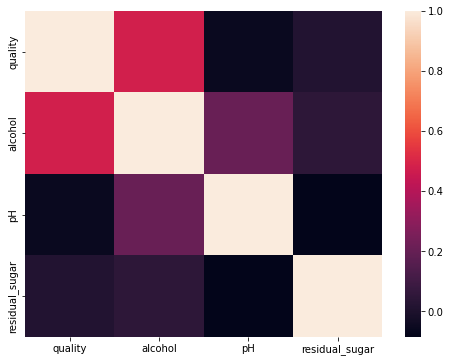

In [88]:
plt.figure()
map_columns = wine_data[['quality','alcohol','pH','residual_sugar']]
sns.heatmap(map_columns.corr())